# Business_Reviews_Cleaning

# Importing required libraries for the project

In [1]:
import re
import nltk
import string
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Get the data

In [2]:
Business_Reviews_DF_ = pd.read_csv('Business with reviews.csv')

# Data Exploration

In [3]:
Num_of_observation, Num_of_features  = Business_Reviews_DF_.shape

print('We have ', Num_of_observation, ' number of observations and ', Num_of_features, ' features for various business reviews.')

We have  229907  number of observations and  32  features for various business reviews.


In [4]:
Business_Reviews_DF_.head(10)

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,False,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,0,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg
3,3,False,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,NaN,...,18,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg
4,4,False,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,NaN,...,3,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw
5,5,False,Wine Bars; Bars; American (New); Nightlife; Re...,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",-yxfBYGB6SEqszmxJxd97A,33.390792,-112.012504,Quiessence Restaurant,NaN,...,743,Deborah,654,user,1584,4,"Quiessence is, simply put, beautiful. Full wi...",review,3,sqYN3lNgvPbPCTRsMFu27g
6,6,False,Mexican; Restaurants,Phoenix,"1919 N 16th St\nPhoenix, AZ 85006",zp713qNhx8d9KCJJnrw1xA,33.469132,-112.047512,La Condesa Gourmet Taco Shop,NaN,...,1187,Monique,295,user,1376,5,Drop what you're doing and drive here. After I...,review,7,wFweIWhv2fREZV_dYkz_1g
7,7,False,Hotels & Travel; Airports,Phoenix,"3400 E Sky Harbor Blvd\nPhoenix, AZ 85034",hW0Ne_HTHEAgGF1rAdmR-g,33.434750,-112.006440,Phoenix Sky Harbor International Airport,NaN,...,85,Heather,173,user,164,4,"Luckily, I didn't have to travel far to make m...",review,1,1ieuYcKS7zeAv_U15AB13A
8,8,False,Sushi Bars; Restaurants,Phoenix,"2574 E Camelback Rd\nPhoenix, AZ 85016",wNUea3IXZWD63bbOQaOH-g,33.509605,-112.025740,Stingray Sushi,NaN,...,9,Sherri,18,user,11,4,Definitely come for Happy hour! Prices are ama...,review,0,Vh_DlizgGhSqQh4qfZ2h6A
9,9,False,Food; Tea Rooms; Japanese; Restaurants,Phoenix,"622 E Adams St\nPhoenix, AZ 85004",nMHhuYan8e3cONo3PornJA,33.449539,-112.065664,Nobuo At Teeter House,NaN,...,0,Mark,6,user,4,5,Nobuo shows his unique talents with everything...,review,1,sUNkXg8-KFtCMQDV6zRzQg


In [5]:
Business_Reviews_DF_.sample(10)

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
53295,53295,False,Active Life; Climbing; Hiking; Parks,Phoenix,"5701 N Echo Canyon Pkwy\nPhoenix, AZ 85073",6rijZ1qIjiq1Dgdy35iqxw,33.521952,-111.974373,Camelback Mountain,NaN,...,170,Robert,94,user,280,5,This is Phoenix' sacred mountain; a prestigiou...,review,1,9mjItdXixKECanLV6RBIrw
38125,38125,False,Restaurants,Sun City,"13600 N 99th Avenue\nSun City, AZ 85351",pL9DLAOrhuxLv_BNX_GM2g,33.607346,-112.268858,Chang Lee Restaurant,NaN,...,1548,Iain,215,user,2092,2,Forget all about old town Scottsdale and all t...,review,3,78Ed1ndOak2kmzljulPfBg
184427,184427,False,Steakhouses; Sushi Bars; Japanese; Restaurants,Scottsdale,"7299 N Scottsdale Rd\nScottsdale, AZ 85253",bgTB6MgdVQssXhkNJ7qIfw,33.542193,-111.925634,Roka Akor,NaN,...,55,Carolyn,123,user,241,2,If I had to judge this place in less than 10 w...,review,1,19BunjXk7zhd811rF42U7w
190683,190683,False,Burgers; Bars; Nightlife; Restaurants,Phoenix,"3146 E Camelback Rd\nPhoenix, AZ 85016",OFBJtqWGSx6n6CchtVmoRw,33.510040,-112.014641,Delux,NaN,...,291,Tonia,308,user,656,4,De. Lish. Us. \n\nDelux was one of the first r...,review,1,7zDqr2I0-xpw9HF5Ha54cA
125126,125126,False,Restaurants; Italian,Scottsdale,"16405 N Scottsdale Ave\nScottsdale, AZ 85254",jGldmslgIegQNM5kvb851Q,33.636060,-111.924248,Maggiano's Little Italy,NaN,...,75,Daniel,79,user,94,5,Two words; Family Style. Forget about Bucca di...,review,1,RNSGaQSkC56tGPfKt9lHjQ
12722,12722,False,Food; Coffee & Tea,Phoenix,"3166 E Camelback Rd\nPhoenix, AZ 85016",2h9LsLPdJ7OvZrYJZhVdAw,33.510051,-112.013510,Hava Java,NaN,...,4,Tina,25,user,21,4,Great coffee and muffins. I have been a patron...,review,1,RZZX5_JiCzxX1ntD5oa7xA
107117,107117,False,Pizza; Restaurants,Scottsdale,"4000 N Scottsdale Rd\nScottsdale, AZ 85251",dcd3C1gWv-vVdQ9XYV8Ubw,33.493841,-111.926814,Grimaldi's Pizzeria,NaN,...,4,L.A.,50,user,51,5,This might be the best pizza I have ever eaten...,review,1,BSP2Jjppw4bgmIJq2SXYYw
164934,164934,False,Breakfast & Brunch; Restaurants,Phoenix,"5022 E Chandler Blvd\nPhoenix, AZ 85048",dGcVT0WGenhh8Np76ta6AA,33.306170,-111.974700,Cracker Barrel Old Country Store,NaN,...,4,Janet,21,user,18,1,I used to love this place and would eat there ...,review,2,_5JSb6VWA3qmxoDKWFFPxQ
155976,155976,False,Thai; Vietnamese; Restaurants,Tempe,"7707 S Kyrene Rd\nTempe, AZ 85284",JBCBlVaHfZUZrq-lQfryDA,33.348072,-111.945147,Pho Da Lat,NaN,...,0,olivia,5,user,4,3,"Food was great as always, and excellent servic...",review,0,g_L785Vm8xtA1VAuoUfvyw
140537,140537,False,Bars; American (Traditional); Nightlife; Resta...,Tempe,"1320 E Broadway Rd\nTempe, AZ 85282",GPAg6fpHEiYNDbd_QWTc8g,33.407559,-111.916968,Horse & Hound Sports Grill,NaN,...,0,Brittny,2,user,2,5,My Favorite Dive in the Valley. Maria (pronoun...,review,1,U17WgOK0pM1W_9A64GwQwg


In [6]:
Business_Reviews_DF_.tail(10)

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
229897,229897,False,Bakeries; Food; Sandwiches; Restaurants,Phoenix,"12635 N Tatum Blvd\nPhoenix, AZ 85032",j5HLcBru7FEirYJPbKFVWA,33.603263,-111.978179,Breadcrafters Bakery & Cafe,NaN,...,494,Megan,169,user,622,2,"No, we just stopped serving breakfast.\nThe on...",review,4,UoBfwbXaixelZBghbJ2cSg
229898,229898,False,American (New); Restaurants,Scottsdale,"7133 E Stetson Dr\nSte 1\nScottsdale, AZ 85251",FV0BkoGOd3Yu_eJnXY15ZA,33.499499,-111.927402,Cowboy Ciao,NaN,...,1,Pam,12,user,10,2,I have been wanting to try Cowboy Ciao for a w...,review,0,tTO6rv0Z9aNNYmmZU_BR4g
229899,229899,False,Car Wash; Automotive,Phoenix,"232 E McDowell Rd\nPhoenix, AZ 85004",Li5LOL873Ep8HoPRML18sw,33.465729,-112.071215,Los Olivos Hand Car Wash,NaN,...,39,David,32,user,58,5,Los Olivos is great! I am a huge fan of any c...,review,1,Ak2jlINPRk9dWWazWUW2hA
229900,229900,False,Breakfast & Brunch; Restaurants,Phoenix,"4730 E Indian School Rd\nSte 123\nPhoenix, AZ ...",Y-9dJvw-J2d9QKfuL7mKgA,33.494820,-111.979821,Over Easy,NaN,...,56,Tim,114,user,231,1,The coffee was good.\nI had the two egg breakf...,review,2,CAlxnkAuqNetlUmWtCQ_eQ
229901,229901,False,Event Planning & Services; Venues & Event Spaces,Phoenix,"3950 E Campbell\nPhoenix, AZ 85018",C1tH3sEQra33EOTk56Eu1Q,33.502702,-111.995947,Radio Cafe,NaN,...,1422,sunny,438,user,2401,3,I'm sorry to this but I must admit I was prett...,review,2,q9XgOylNsSbqZqF_SO3-OQ
229902,229902,False,Gastropubs; Restaurants,Tempe,"1706 E Warner Rd\nSte 3\nTempe, AZ 85284",vnffHkFJbmd-J3OaBbK2Eg,33.334616,-111.912060,Spitfire Grill & Tavern,NaN,...,18,Lisa,82,user,111,2,I really wanted to like this place because it'...,review,0,6e7pZofhDuIlD_rX2oYirQ
229903,229903,False,Hotels & Travel; Event Planning & Services; Ho...,Peoria,"27501 N Lake Pleasant Rd\nPeoria, AZ 85383",l5oUrgQ190l8CcN8uzd_pA,33.731766,-112.262864,Cibola Vista Resort,NaN,...,29,Jonquil,47,user,50,1,My husband I stayed here for two nights. Of c...,review,2,dDNfSFT0VApxPmURclX6_g
229904,229904,False,Pubs; Bars; American (Traditional); Nightlife;...,Tempe,"530 W Broadway\nTempe, AZ 85281",-EctXOb3B7T177jGYUhjVA,33.407561,-111.947525,Boulders On Broadway,NaN,...,2,Amanda,4,user,2,4,Cool atmosphere. A lot of beers on tap and goo...,review,0,M5wHt6Odh1k5v0tIjqd8DQ
229905,229905,False,Wine Bars; Bars; Pizza; Nightlife; Restaurants,Tempe,"699 S Mill Ave\nTempe, AZ 85281",YQvg0JCGRFUkb6reMMf3Iw,33.423441,-111.939622,La Bocca Urban Pizzeria + Wine Bar,NaN,...,378,Valerie,196,user,678,3,I have to take a star off for the spotty servi...,review,2,jopndPrv-H5KW2CfScnw9A
229906,229906,False,Churches; Religious Organizations,Phoenix,"15220 S 50th St\nSte 101\nPhoenix, AZ 85044",gKxOZvQTTd5hpFa3r5igGQ,33.307950,-111.976067,New Valley Church,NaN,...,5,Jeff,32,user,15,5,"So cool, yo.",review,0,mbRUG6h0Mgb2XIJvscIoMg


In [7]:
Business_Reviews_DF_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229907 entries, 0 to 229906
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              229907 non-null  int64  
 1   business_blank          229907 non-null  bool   
 2   business_categories     229130 non-null  object 
 3   business_city           229907 non-null  object 
 4   business_full_address   229907 non-null  object 
 5   business_id             229907 non-null  object 
 6   business_latitude       229907 non-null  float64
 7   business_longitude      229907 non-null  float64
 8   business_name           229907 non-null  object 
 9   business_neighborhoods  0 non-null       float64
 10  business_open           229907 non-null  bool   
 11  business_review_count   229907 non-null  int64  
 12  business_stars          229907 non-null  float64
 13  business_state          229907 non-null  object 
 14  business_type       

# Data Cleaning

## - "business_categories" will be split to name of (categories)

In [8]:
Business_Reviews_DF_['business_categories']=Business_Reviews_DF_['business_categories'].apply(lambda x : str(x).split(';')[0:][-1:])
Business_Reviews_DF_

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,[ Restaurants],Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,[ Restaurants],Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,False,[ Restaurants],Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,0,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg
3,3,False,[ Parks],Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,NaN,...,18,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg
4,4,False,[ Automotive],Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,NaN,...,3,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229902,229902,False,[ Restaurants],Tempe,"1706 E Warner Rd\nSte 3\nTempe, AZ 85284",vnffHkFJbmd-J3OaBbK2Eg,33.334616,-111.912060,Spitfire Grill & Tavern,NaN,...,18,Lisa,82,user,111,2,I really wanted to like this place because it'...,review,0,6e7pZofhDuIlD_rX2oYirQ
229903,229903,False,[ Hotels],Peoria,"27501 N Lake Pleasant Rd\nPeoria, AZ 85383",l5oUrgQ190l8CcN8uzd_pA,33.731766,-112.262864,Cibola Vista Resort,NaN,...,29,Jonquil,47,user,50,1,My husband I stayed here for two nights. Of c...,review,2,dDNfSFT0VApxPmURclX6_g
229904,229904,False,[ Restaurants],Tempe,"530 W Broadway\nTempe, AZ 85281",-EctXOb3B7T177jGYUhjVA,33.407561,-111.947525,Boulders On Broadway,NaN,...,2,Amanda,4,user,2,4,Cool atmosphere. A lot of beers on tap and goo...,review,0,M5wHt6Odh1k5v0tIjqd8DQ
229905,229905,False,[ Restaurants],Tempe,"699 S Mill Ave\nTempe, AZ 85281",YQvg0JCGRFUkb6reMMf3Iw,33.423441,-111.939622,La Bocca Urban Pizzeria + Wine Bar,NaN,...,378,Valerie,196,user,678,3,I have to take a star off for the spotty servi...,review,2,jopndPrv-H5KW2CfScnw9A


In [9]:
Business_Reviews_DF_['business_categories']= [''.join(map(str, l)) for l in Business_Reviews_DF_['business_categories']]
Business_Reviews_DF_

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,False,Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,0,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg
3,3,False,Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,NaN,...,18,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg
4,4,False,Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,NaN,...,3,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229902,229902,False,Restaurants,Tempe,"1706 E Warner Rd\nSte 3\nTempe, AZ 85284",vnffHkFJbmd-J3OaBbK2Eg,33.334616,-111.912060,Spitfire Grill & Tavern,NaN,...,18,Lisa,82,user,111,2,I really wanted to like this place because it'...,review,0,6e7pZofhDuIlD_rX2oYirQ
229903,229903,False,Hotels,Peoria,"27501 N Lake Pleasant Rd\nPeoria, AZ 85383",l5oUrgQ190l8CcN8uzd_pA,33.731766,-112.262864,Cibola Vista Resort,NaN,...,29,Jonquil,47,user,50,1,My husband I stayed here for two nights. Of c...,review,2,dDNfSFT0VApxPmURclX6_g
229904,229904,False,Restaurants,Tempe,"530 W Broadway\nTempe, AZ 85281",-EctXOb3B7T177jGYUhjVA,33.407561,-111.947525,Boulders On Broadway,NaN,...,2,Amanda,4,user,2,4,Cool atmosphere. A lot of beers on tap and goo...,review,0,M5wHt6Odh1k5v0tIjqd8DQ
229905,229905,False,Restaurants,Tempe,"699 S Mill Ave\nTempe, AZ 85281",YQvg0JCGRFUkb6reMMf3Iw,33.423441,-111.939622,La Bocca Urban Pizzeria + Wine Bar,NaN,...,378,Valerie,196,user,678,3,I have to take a star off for the spotty servi...,review,2,jopndPrv-H5KW2CfScnw9A


## - EDA
(Drop Unnecessary Columns and Duplicate)

In [10]:
to_be_dropped = ['Unnamed: 0', 'business_blank','business_full_address','business_open','business_latitude','business_longitude','business_neighborhoods','business_review_count','business_state','business_type','cool','date','funny','reviewer_average_stars','reviewer_blank','reviewer_cool','reviewer_funny','reviewer_review_count','reviewer_type','reviewer_useful','useful','type']
Business_Reviews_DF_.drop(to_be_dropped, axis=1, inplace=True)

In [11]:
Business_Reviews_DF_ = Business_Reviews_DF_.astype({"business_stars": int})

In [12]:
Business_Reviews_DF_.dropna(inplace=True)

In [13]:
Business_Reviews_DF_.isnull().sum()

business_categories    0
business_city          0
business_id            0
business_name          0
business_stars         0
review_id              0
reviewer_name          0
stars                  0
text                   0
user_id                0
dtype: int64

In [14]:
Business_Reviews_DF_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215877 entries, 0 to 229906
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   business_categories  215877 non-null  object
 1   business_city        215877 non-null  object
 2   business_id          215877 non-null  object
 3   business_name        215877 non-null  object
 4   business_stars       215877 non-null  int32 
 5   review_id            215877 non-null  object
 6   reviewer_name        215877 non-null  object
 7   stars                215877 non-null  int64 
 8   text                 215877 non-null  object
 9   user_id              215877 non-null  object
dtypes: int32(1), int64(1), object(8)
memory usage: 17.3+ MB


In [15]:
Business_Reviews_DF_.drop_duplicates().reset_index(drop=True)

,business_categories,business_city,business_id,business_name,business_stars,review_id,reviewer_name,stars,text,user_id
0,Restaurants,Phoenix,9yKzy9PApeiPPOUJEtnvkg,Morning Glory Cafe,4,fWKvX83p0-ka4JS3dc6E5A,Jason,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q
1,Restaurants,Phoenix,ZRJwVLyzEJq1VAihDhYiow,Spinato's Pizzeria,4,IjZ33sJrzXqU-0X6U8NwyA,Paul,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ
2,Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,Haji-Baba,4,IESLBzqUCLdSzSqm0eCSxQ,Nicole,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg
3,Parks,Scottsdale,_1QQZuf4zZOyFCvXc0o6Vg,Chaparral Dog Park,4,G-WvGaISbqqaMHlNnByodA,lindsey,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg
4,Automotive,Mesa,6ozycU1RpktNG2-1BroVtw,Discount Tire,4,1uJFq2r5QfJG_6ExMRCaGw,Roger,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw
...,...,...,...,...,...,...,...,...,...,...
215872,Restaurants,Tempe,vnffHkFJbmd-J3OaBbK2Eg,Spitfire Grill & Tavern,3,f9JaiNg_FMoPNWxt7MlbZQ,Lisa,2,I really wanted to like this place because it'...,6e7pZofhDuIlD_rX2oYirQ
215873,Hotels,Peoria,l5oUrgQ190l8CcN8uzd_pA,Cibola Vista Resort,2,QDWRP1pW5r0huIBAoGmFyg,Jonquil,1,My husband I stayed here for two nights. Of c...,dDNfSFT0VApxPmURclX6_g
215874,Restaurants,Tempe,-EctXOb3B7T177jGYUhjVA,Boulders On Broadway,4,JmR3yk7JlS1LVVxtIc3xBQ,Amanda,4,Cool atmosphere. A lot of beers on tap and goo...,M5wHt6Odh1k5v0tIjqd8DQ
215875,Restaurants,Tempe,YQvg0JCGRFUkb6reMMf3Iw,La Bocca Urban Pizzeria + Wine Bar,4,z5b2p5TbCg0uaIiIe8n62w,Valerie,3,I have to take a star off for the spotty servi...,jopndPrv-H5KW2CfScnw9A


In [16]:
Business_Reviews_DF_.rename(columns = {'text': 'reviews'}, inplace = True)

In [17]:
Business_Reviews_DF_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215877 entries, 0 to 229906
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   business_categories  215877 non-null  object
 1   business_city        215877 non-null  object
 2   business_id          215877 non-null  object
 3   business_name        215877 non-null  object
 4   business_stars       215877 non-null  int32 
 5   review_id            215877 non-null  object
 6   reviewer_name        215877 non-null  object
 7   stars                215877 non-null  int64 
 8   reviews              215877 non-null  object
 9   user_id              215877 non-null  object
dtypes: int32(1), int64(1), object(8)
memory usage: 17.3+ MB


## - Classify the reviews (Positive and Negative)

In [18]:
Business_Reviews_DF=Business_Reviews_DF_.copy()

In [19]:
# Remove 3 star reviews
Business_Reviews_DF = Business_Reviews_DF[Business_Reviews_DF.stars!=3]

# Set 4/5 star reviews to positive, the rest to negative
Business_Reviews_DF['sentiment'] = np.where(Business_Reviews_DF['stars'] >= 4, 'positive', 'negative')

# Include only the sentiment and reviews columns
Business_Reviews_DF = Business_Reviews_DF[['sentiment', 'reviews']]
Business_Reviews_DF.head()

,sentiment,reviews
0,positive,My wife took me here on my birthday for breakf...
1,positive,I have no idea why some people give bad review...
2,positive,love the gyro plate. Rice is so good and I als...
3,positive,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,positive,General Manager Scott Petello is a good egg!!!...


In [20]:
Business_Reviews_DF.shape

(182981, 2)

In [21]:
Business_Reviews_DF.sentiment.value_counts()

positive    147125
negative     35856
Name: sentiment, dtype: int64

In [22]:
# Note that the dataset has mostly positive reviews
Business_Reviews_DF.sentiment.value_counts(normalize=True)

positive    0.804045
negative    0.195955
Name: sentiment, dtype: float64

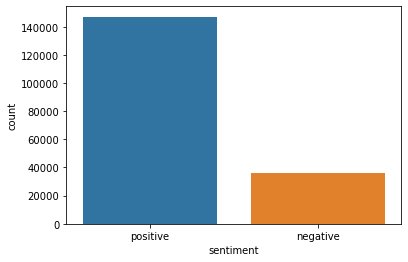

In [23]:
sns.countplot(data=Business_Reviews_DF, x='sentiment');

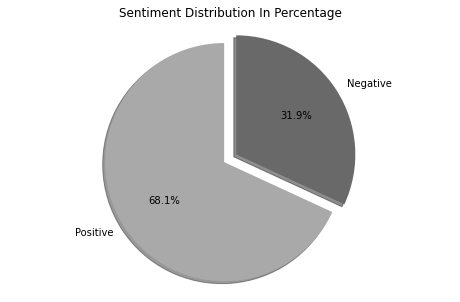

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(8,5))
labels= ['Positive', 'Negative']
colors=[ 'darkgray','dimgray']
sizes= [26521, 12411]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%',shadow=True, explode=[0.1,0.02])
plt.axis('equal')
plt.title("Sentiment Distribution In Percentage")
plt.show()
plt.savefig('images/Sentiment Distribution In Percentage.png', bbox_inches='tight')

# Preprocessing 

In [25]:
# remove numbers, captial letters and punctuation

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

Business_Reviews_DF['reviews_processed'] = Business_Reviews_DF.reviews.map(alphanumeric).map(punc_lower)
Business_Reviews_DF.head()

,sentiment,reviews,reviews_processed
0,positive,My wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...
1,positive,I have no idea why some people give bad review...,i have no idea why some people give bad review...
2,positive,love the gyro plate. Rice is so good and I als...,love the gyro plate rice is so good and i als...
3,positive,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",rosie dakota and i love chaparral dog park ...
4,positive,General Manager Scott Petello is a good egg!!!...,general manager scott petello is a good egg ...


In [26]:
Business_Reviews_DF['reviews_processed'] = Business_Reviews_DF['reviews_processed'].map(lambda x: re.sub('[,\.!?]','',x))
Business_Reviews_DF['reviews_processed'] = Business_Reviews_DF['reviews_processed'].map(lambda x:x.lower())
Business_Reviews_DF['reviews_processed'].head()

0    my wife took me here on my birthday for breakf...
1    i have no idea why some people give bad review...
2    love the gyro plate  rice is so good and i als...
3    rosie  dakota  and i love chaparral dog park  ...
4    general manager scott petello is a good egg   ...
Name: reviews_processed, dtype: object

In [27]:
def cleanText(input_string):
    modified_string = re.sub('[^A-Za-z0-9]+', ' ', input_string)
    return(modified_string)

Business_Reviews_DF['reviews_processed'] = Business_Reviews_DF.reviews_processed.apply(cleanText)
Business_Reviews_DF['reviews_processed'].head()

0    my wife took me here on my birthday for breakf...
1    i have no idea why some people give bad review...
2    love the gyro plate rice is so good and i also...
3    rosie dakota and i love chaparral dog park it ...
4    general manager scott petello is a good egg no...
Name: reviews_processed, dtype: object

In [28]:
stopWords = stopwords.words('english')

def removeStopWords(stopWords, rvw_txt):
    newtxt = ' '.join([word for word in rvw_txt.split() if word not in stopWords])
    return newtxt

Business_Reviews_DF['reviews_processed'] = [removeStopWords(stopWords,x) for x in Business_Reviews_DF['reviews_processed']]

In [29]:
Business_Reviews_DF.head()

,sentiment,reviews,reviews_processed
0,positive,My wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...
1,positive,I have no idea why some people give bad review...,idea people give bad reviews place goes show p...
2,positive,love the gyro plate. Rice is so good and I als...,love gyro plate rice good also dig candy selec...
3,positive,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",rosie dakota love chaparral dog park convenien...
4,positive,General Manager Scott Petello is a good egg!!!...,general manager scott petello good egg go deta...


## - Feature Engineering

In [30]:
Business_Reviews_DF['Raw Length']=Business_Reviews_DF['reviews'].apply(lambda x: len(x.split()))
Business_Reviews_DF.head()

,sentiment,reviews,reviews_processed,Raw Length
0,positive,My wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...,155
1,positive,I have no idea why some people give bad review...,idea people give bad reviews place goes show p...,257
2,positive,love the gyro plate. Rice is so good and I als...,love gyro plate rice good also dig candy selec...,16
3,positive,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",rosie dakota love chaparral dog park convenien...,76
4,positive,General Manager Scott Petello is a good egg!!!...,general manager scott petello good egg go deta...,86


In [31]:
# word_tokenize 
Business_Reviews_DF["tokenized"] = Business_Reviews_DF["reviews_processed"].apply(lambda x: nltk.word_tokenize(x))
Business_Reviews_DF["tokenized"] = Business_Reviews_DF["tokenized"].apply(lambda words: [word for word in words if word.isalnum()])
Business_Reviews_DF

,sentiment,reviews,reviews_processed,Raw Length,tokenized
0,positive,My wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...,155,"[wife, took, birthday, breakfast, excellent, w..."
1,positive,I have no idea why some people give bad review...,idea people give bad reviews place goes show p...,257,"[idea, people, give, bad, reviews, place, goes..."
2,positive,love the gyro plate. Rice is so good and I als...,love gyro plate rice good also dig candy selec...,16,"[love, gyro, plate, rice, good, also, dig, can..."
3,positive,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",rosie dakota love chaparral dog park convenien...,76,"[rosie, dakota, love, chaparral, dog, park, co..."
4,positive,General Manager Scott Petello is a good egg!!!...,general manager scott petello good egg go deta...,86,"[general, manager, scott, petello, good, egg, ..."
...,...,...,...,...,...
229900,negative,The coffee was good.\nI had the two egg breakf...,coffee good two egg breakfast asked toast inst...,142,"[coffee, good, two, egg, breakfast, asked, toa..."
229902,negative,I really wanted to like this place because it'...,really wanted like place close home honestly b...,177,"[really, wanted, like, place, close, home, hon..."
229903,negative,My husband I stayed here for two nights. Of c...,husband stayed two nights course room ready al...,156,"[husband, stayed, two, nights, course, room, r..."
229904,positive,Cool atmosphere. A lot of beers on tap and goo...,cool atmosphere lot beers tap good food went s...,25,"[cool, atmosphere, lot, beers, tap, good, food..."


# Save data after cleaning

In [32]:
Num_of_observation, Num_of_features  = Business_Reviews_DF.shape

print('After cleaning, we have ', Num_of_observation, ' number of observations and ', Num_of_features, ' features for various business reviews.')

After cleaning, we have  182981  number of observations and  5  features for various business reviews.


In [33]:
#Business_Reviews_DF.to_csv('Data/Business_Reviews.csv', index=False)
filename = 'Data/Business_Reviews.pkl'
pickle.dump(Business_Reviews_DF, open(filename, 'wb'))

In [34]:
Num_of_observation, Num_of_features  = Business_Reviews_DF_.shape

print('After cleaning, we have ', Num_of_observation, ' number of observations and ', Num_of_features, ' features for various business reviews.')

After cleaning, we have  215877  number of observations and  10  features for various business reviews.


In [35]:
#Business_Reviews_DF_.to_csv('Data/Business_Reviews(basis).csv', index=False)
filename = 'Data/Business_Reviews(basis).pkl'
pickle.dump(Business_Reviews_DF_, open(filename, 'wb'))